# Install

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch

In [ ]:
from torchvision import datasets, transforms

In [ ]:
import torch.nn as nn

# Preprocess

In [ ]:
# Define transformations for MNIST
mnist_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors and normalize to [0, 1]
    transforms.Lambda(lambda x: x.view(1, 28, 28))  # Ensure MNIST remains grayscale (28x28x1)
])

# Load MNIST dataset
mnist_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=mnist_transform)
mnist_test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=mnist_transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.56MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 65.8kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.08MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.31MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Define transformations for CIFAR-10
cifar10_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors and normalize to [0, 1]
])

# Load CIFAR-10 dataset
cifar10_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=cifar10_transform)
cifar10_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=cifar10_transform)

100%|██████████| 170M/170M [00:18<00:00, 9.16MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# Create data loaders
batch_size = 64

mnist_train_loader = torch.utils.data.DataLoader(dataset=mnist_train_dataset, batch_size=batch_size, shuffle=True)
mnist_test_loader = torch.utils.data.DataLoader(dataset=mnist_test_dataset, batch_size=batch_size, shuffle=False)

cifar10_train_loader = torch.utils.data.DataLoader(dataset=cifar10_train_dataset, batch_size=batch_size, shuffle=True)
cifar10_test_loader = torch.utils.data.DataLoader(dataset=cifar10_test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Example of accessing a batch of data
mnist_images, mnist_labels = next(iter(mnist_train_loader))
cifar10_images, cifar10_labels = next(iter(cifar10_train_loader))

def check_datasets():
    mnist_images, mnist_labels = next(iter(mnist_train_loader))
    cifar10_images, cifar10_labels = next(iter(cifar10_train_loader))

    print(f"MNIST batch shape: {mnist_images.shape}")  # Should be [batch_size, 1, 28, 28]
    print(f"CIFAR-10 batch shape: {cifar10_images.shape}")  # Should be [batch_size, 3, 32, 32]

    # Verify pixel values are between 0 and 1
    assert mnist_images.min() >= 0 and mnist_images.max() <= 1, "MNIST pixel values are not in the range [0, 1]"
    assert cifar10_images.min() >= 0 and cifar10_images.max() <= 1, "CIFAR-10 pixel values are not in the range [0, 1]"

    print("MNIST and CIFAR-10 pixel values are within the range [0, 1]")

check_datasets()

MNIST batch shape: torch.Size([64, 1, 28, 28])
CIFAR-10 batch shape: torch.Size([64, 3, 32, 32])
MNIST and CIFAR-10 pixel values are within the range [0, 1]


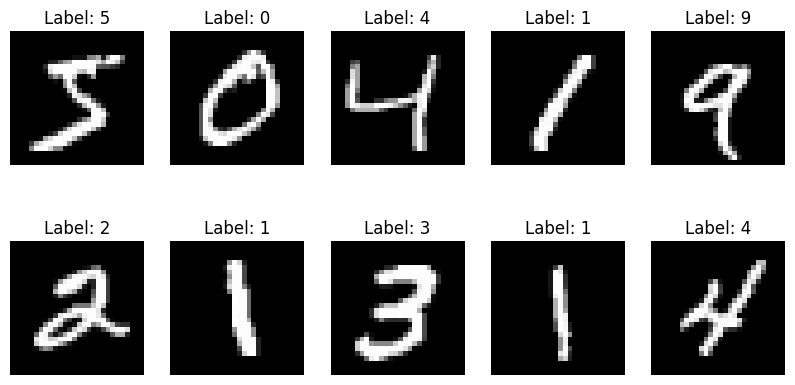

MNIST Image Dimensions: torch.Size([1, 28, 28])


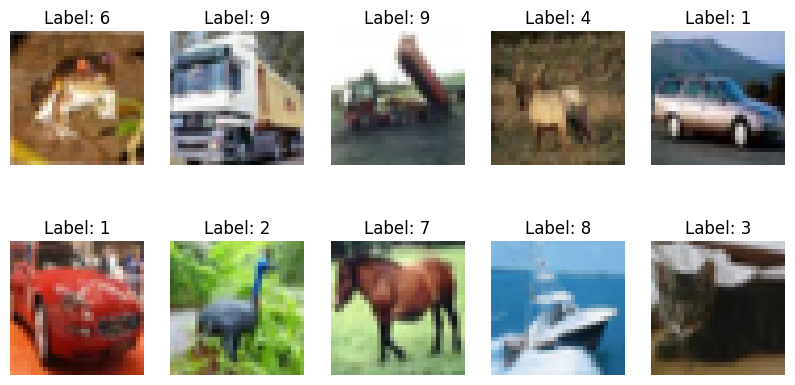

CIFAR-10 Image Dimensions: torch.Size([3, 32, 32])


In [ ]:
import matplotlib.pyplot as plt

# Display first 10 images from MNIST
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(mnist_train_dataset[i][0].squeeze(), cmap='gray')  # squeeze() removes the channel dimension for MNIST
    plt.title(f"Label: {mnist_train_dataset[i][1]}")
    plt.axis('off')
plt.show()
print(f"MNIST Image Dimensions: {mnist_train_dataset[0][0].shape}")

# Display first 10 images from CIFAR-10
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cifar10_train_dataset[i][0].permute(1, 2, 0))  # permute() reorders dimensions for CIFAR-10
    plt.title(f"Label: {cifar10_train_dataset[i][1]}")
    plt.axis('off')
plt.show()
print(f"CIFAR-10 Image Dimensions: {cifar10_train_dataset[0][0].shape}")

# Models

# LeNet-5

In [ ]:
class LeNetMNIST(nn.Module):
    def __init__(self):
        super(LeNetMNIST, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)  # Input: 1x28x28 -> Output: 6x28x28
        self.avg_pool1 = nn.AvgPool2d(kernel_size=2, stride=2)  # Output: 6x14x14

        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # Output: 16x10x10
        self.avg_pool2 = nn.AvgPool2d(kernel_size=2, stride=2)  # Output: 16x5x5

        # Flatten layer
        self.flatten = nn.Flatten()  # Output: 400 (16*5*5)

        # Fully connected layers
        self.fc1 = nn.Dense(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolutional layers
        x = self.relu(self.conv1(x))
        x = self.avg_pool1(x)

        x = self.relu(self.conv2(x))
        x = self.avg_pool2(x)

        # Flatten
        x = self.flatten(x)

        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
class LeNetCIFAR10(nn.Module):
    def __init__(self):
        super(LeNetCIFAR10, self).__init__()
        # Main difference: Input channels = 3 for RGB images
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, padding=2)  # Input: 3x32x32 -> Output: 6x32x32
        self.avg_pool1 = nn.AvgPool2d(kernel_size=2, stride=2)  # Output: 6x16x16

        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # Output: 16x12x12
        self.avg_pool2 = nn.AvgPool2d(kernel_size=2, stride=2)  # Output: 16x6x6

        # Flatten layer
        self.flatten = nn.Flatten()  # Output: 576 (16*6*6)

        # Fully connected layers adjusted for larger input size
        self.fc1 = nn.Linear(576, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolutional layers
        x = self.relu(self.conv1(x))
        x = self.avg_pool1(x)

        x = self.relu(self.conv2(x))
        x = self.avg_pool2(x)

        # Flatten
        x = self.flatten(x)

        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
# Example usage
def create_models():
    mnist_model = LeNetMNIST()
    cifar_model = LeNetCIFAR10()
    return mnist_model, cifar_model

# AlexNet

In [ ]:
def build_alexnet(input_shape):
    model = models.Sequential([
        layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape, padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
        layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
        layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
        layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
        layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Example usage:
# alexnet_model = build_alexnet((227, 227, 3))  # For CIFAR-10 (resized to 227x227)
# alexnet_model = build_alexnet((28, 28, 1))    # For MNIST (resized to 227x227)

# ResNet

In [ ]:
def build_resnet(input_shape):
    def residual_block(x, filters, kernel_size=3, stride=1):
        shortcut = x
        x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
        x = layers.BatchNormalization()(x)
        if stride != 1 or shortcut.shape[-1] != filters:
            shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)
        x = layers.add([x, shortcut])
        x = layers.Activation('relu')(x)
        return x

    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, x)
    return model

# Example usage:
# resnet_model = build_resnet((32, 32, 3))  # For CIFAR-10
# resnet_model = build_resnet((28, 28, 1))  # For MNIST

# Model Training

In [ ]:
import tensorflow as tf


In [ ]:
# Load and preprocess the datasets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train_mnist = x_train_mnist.astype('float32') / 255.0
x_test_mnist = x_test_mnist.astype('float32') / 255.0
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

# Reshape MNIST to (28, 28, 1)
x_train_mnist = x_train_mnist[..., tf.newaxis]
x_test_mnist = x_test_mnist[..., tf.newaxis]

# Convert labels to one-hot encoding
y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, 10)
y_train_cifar = tf.keras.utils.to_categorical(y_train_cifar, 10)
y_test_cifar = tf.keras.utils.to_categorical(y_test_cifar, 10)

# Build and compile the models
lenet5_model = build_lenet5((28, 28, 1))
alexnet_model = build_alexnet((227, 227, 3))  # Resize CIFAR-10 to 227x227
resnet_model = build_resnet((32, 32, 3))

lenet5_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
lenet5_history = lenet5_model.fit(x_train_mnist, y_train_mnist, epochs=5, validation_data=(x_test_mnist, y_test_mnist))
alexnet_history = alexnet_model.fit(x_train_cifar, y_train_cifar, epochs=5, validation_data=(x_test_cifar, y_test_cifar))
resnet_history = resnet_model.fit(x_train_cifar, y_train_cifar, epochs=5, validation_data=(x_test_cifar, y_test_cifar))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


NameError: name 'build_lenet5' is not defined

# Accuracy

In [ ]:
# To test various models